In [1]:
import numpy as np
import scikit_posthocs as sp # pip3 install scikit-posthocs
import scipy.stats as ss
import pandas as pd
from autorank import autorank, create_report, plot_stats # pip3 install autorank
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from matplotlib import gridspec

In [2]:
# cols_baard = [
#     '#81C784',  # Stage 1  
#     '#4CAF50',  # Stage 2
#     '#388E3C'   # Stage 3
# ]
cols = [
    '#4CAF50',  # baard
    '#b166d0',  # magnet
    '#2196f3',  # rc
    '#F9A825',  # lid
    '#ff1744',  # fs
]

In [3]:
name_nicely = {
    "banknote": "Banknote",
    "breastcancer": "BrCancer",
    "cifar10": "CIFAR-10",
    "htru2": "HTRU2",
    "mnist": "MNIST",
    "dnn": "DNN",
    "resnet": "ResNet",
    "svm": "SVM",
    "tree": "Tree",
    "vgg": "VGG",
    "baard": "BAARD",
    "fs": "FS",
    "lid": "LID",
    "magnet": "MagNet",
    "rc": "RC"
}

In [4]:
df = pd.read_csv('full_results.csv')
df['Dataset and Classifier'] = df['data'].map(name_nicely) + "\n " + df['model'].map(name_nicely)
df['Defence'] = df['defence'].map(name_nicely)
df['Defence'] = pd.Categorical(df['Defence'], ['BAARD', 'MagNet', 'RC', 'LID', 'FS'])
df = df.sort_values("Defence")
df

,data,model,attack,adv_param,defence,acc_no_def,acc_on_adv,fpr,Dataset and Classifier,Defence
0,banknote,dnn,apgd,0.05,baard,0.766839,0.937824,0.005181,Banknote\n DNN,BAARD
1783,cifar10,resnet,cw2,5.00,baard,0.000000,0.164000,0.070000,CIFAR-10\n ResNet,BAARD
1782,cifar10,resnet,cw2,5.00,baard,0.000000,0.153000,0.061000,CIFAR-10\n ResNet,BAARD
1781,cifar10,resnet,cw2,5.00,baard,0.000000,0.094000,0.034000,CIFAR-10\n ResNet,BAARD
1780,cifar10,resnet,cw2,5.00,baard,0.000000,0.151000,0.062000,CIFAR-10\n ResNet,BAARD
...,...,...,...,...,...,...,...,...,...,...
2514,cifar10,vgg,fgsm,0.10,fs,0.033000,0.273000,0.049000,CIFAR-10\n VGG,FS
2513,cifar10,vgg,fgsm,0.10,fs,0.039000,0.272000,0.044000,CIFAR-10\n VGG,FS
2512,cifar10,vgg,fgsm,0.10,fs,0.037000,0.274000,0.042000,CIFAR-10\n VGG,FS
3651,mnist,dnn,apgd2,3.00,fs,0.074000,0.933000,0.061000,MNIST\n DNN,FS


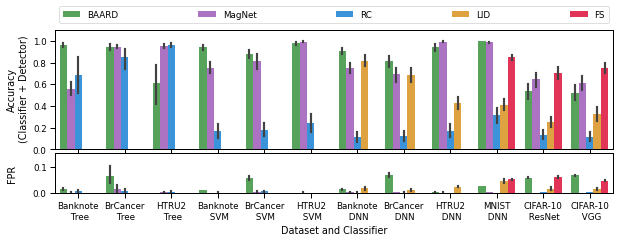

In [9]:
sns.set_context("paper")
fig = plt.figure(figsize=(10,3))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
gs.update(hspace=0.05)

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
p = cols
d = 0.5

order = [
       'Banknote\n Tree', 'BrCancer\n Tree', 'HTRU2\n Tree', 
       'Banknote\n SVM', 'BrCancer\n SVM', 'HTRU2\n SVM',
       'Banknote\n DNN', 'BrCancer\n DNN', 'HTRU2\n DNN',
       'MNIST\n DNN', 'CIFAR-10\n ResNet', 'CIFAR-10\n VGG']
hue_order = ['BAARD', 'MagNet', 'RC', 'LID', 'FS']

s1 = sns.barplot(x='Dataset and Classifier', y='acc_on_adv', hue='Defence', data=df, ax=ax0,
                 order=order, palette=p, hue_order=hue_order)
s1.set(ylabel="Accuracy\n (Classifier + Detector)", xlabel=None, xticklabels=[])
s1.legend_.remove()
s1.set(ylim=(0., 1.1))

s2 = sns.barplot(x='Dataset and Classifier', y='fpr', hue='Defence', data=df, ax=ax1,
                 order=order, palette=p, hue_order=hue_order)
s2.set(ylabel="FPR\n")
s2.set(ylim=(0., 0.15))

plt.legend(bbox_to_anchor=(0., 4.7, 1., .102), loc='upper center', ncol=6, mode="expand",
       borderaxespad=0.5)

plt.savefig('barplot_all.pdf', format='pdf', dpi=1200, bbox_inches='tight')